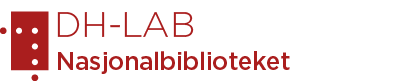

In [1]:
import dhlab as dh
from dhlab.api.dhlab_api import totals
import dhlab.legacy.nbtext as nb

wordcloud er ikke installert, kan ikke lage ordskyer


# 3. Kollokasjoner eller assosiasjoner

I denne notebooken viser vi eksempler på undersøkelser man kan gjøre for å finne ord som opptrer påfallende ofte sammen med et bestemt målord, og som derfor har en sterk assosiasjon med målordet i et gitt korpus.


## 3.1. Konstruer et korpus 

Først må vi ha et tekstutvalg. Vi bygger et korpus med en gitt dewey-kategori. For å finne relevant dewey-klassifikasjon kan [Webdewey](http://deweysearchno.pansoft.de/webdeweysearch/index.html) være til god hjelp.

Se eksempelfil om [Korpusbygging](https://nbviewer.org/github/NationalLibraryOfNorway/digital_tekstanalyse/blob/main/1_Bygg_korpus.ipynb) for andre måter å definere korpus.

In [2]:
# korpus med inntil 200 bøker fra dewey 641.2 (drikkevarer) utgitt mellom 1960 og 2020

korpus = dh.Corpus(doctype="digibok", ddk="641.2%", from_year=1960, to_year=2020, limit=200)

For å se metadata fra korpuset som dataramme brukes `.corpus`-attributtet fra `Corpus`-instansen. Man kan bruke `.head(n)` for å begrense antall `n` rader som vises.

In [3]:
korpus.corpus.head(2)

,dhlabid,urn,title,authors,oaiid,sesamid,isbn10,city,timestamp,year,publisher,langs,subjects,ddc,genres,literaryform,doctype
0,100417937,URN:NBN:no-nb_digibok_2020040107002,Espens ølsafari : de beste ølturene og den bes...,"Smith , Espen / Lello , Niklas",oai:nb.bibsys.no:991321172074702202,8bb5f0a1ae77eb084b5bbc75cca7db51,,,20130101,2013,Gursli Berg,nob,,641.23094 / 641.23,,Faglitteratur,digibok
1,100392431,URN:NBN:no-nb_digibok_2018103007366,Ølsmaking : finn dine favorittøl,"Foseid , Gustav",oai:nb.bibsys.no:991511439864702202,f702b24b9f1f2375cd9f43ca97959925,,Oslo,20150101,2015,Kagge,nob,,641.23 / 641.23,,Faglitteratur,digibok


## 3.2. Lag kollokasjoner fra korpuset

Steg for steg: 

1. [Bygg kollokasjon](#321-bygg-kollokasjon)    
2. [Finn en referanse](#322-finn-referanse)
3. [Sammenlign kollokasjon med referanse](#323-sammenlign-kollokasjon-med-referanse)

### 3.2.1. Bygg kollokasjon

Hent ut kollokasjoner fra korpuset med `dh.Collocations`.

Vi søker etter konkordanser med `dh.Concordance` for å sjekke at analysene funker med korpuset vårt. 

In [4]:
dh.Concordance(corpus=korpus, query="sei").show()

,link,concordance
6,URN:NBN:no-nb_digibok_2020112407621,"... Ved Bull Run gik de reint gæli . "" "" Men sei me no du Jørn , håfør ha med denna krigen..."
2,URN:NBN:no-nb_digibok_2018031548126,"... den enkelte råvare og tilberedningsmetoden det handler om . Sei har en litt tyngre smak , ser litt gråere ut..."
7,URN:NBN:no-nb_digibok_2020120907530,"Bedales of Borough Market 5 Bedale St , London SEI 9 AL"
1,URN:NBN:no-nb_digibok_2018031548126,Det er ikke uten grunn at melstekt sei går under betegnelsen seibiff . For seiv om seien er en hvit...
0,URN:NBN:no-nb_digibok_2018031548126,vin til melstekt sei
3,URN:NBN:no-nb_digibok_2018042548149,"... men O HVIT FISK , nesten alt går . Sei , hyse , kolje , kveite , hva som helst..."
5,URN:NBN:no-nb_digibok_2020112407621,"Sjå Løksli de ligg no so fint fram mæ li , no sei dei at Knut vil te Mæland å..."
4,URN:NBN:no-nb_digibok_2020112407621,"... Så skulle ølet "" skakast ned "" , det vil sei fyllast over på tunna . Då smaka dei gjerne på ølet..."


Vi definerer først en variabel med et bestemt målord som vi ønsker å hente ut kollokasjoner for.

Det gjør det lettere å kjøre hele notebooken i flere omganger for ulike målord, man trenger bare bytte ut ordet i denne kodecellen.

In [5]:
collword = 'rødvin'

Så kan vi hente ut selve kollokasjonen, dvs. ord som står innenfor en viss avstand fra målordet. 

Antall ord før og etter målordet kan endres ut fra konteksten man vil undersøke.

In [6]:
# Vi legger inn variablen collword som søkeord, med 5 ord før og etter. 
coll = dh.Collocations(corpus=korpus, words=collword, after=5, before=5, samplesize=1000)

Kollokasjonen ligger i en [`pandas DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) som kan sorteres på frekvens med `.sort()`, og undersøkes med `.head()`.

In [7]:
# Sorter fra høyest til lavest frekvens med .sort(), og lagre en kopi av den sorterte frekvenstabellen i en ny variabel
coll_df = coll.sort().frame.copy()
# Bruk .head(n) for å vise topp n treff 
coll_df.head(10)

,counts
.,371
",",364
og,247
en,224
med,158
er,123
som,110
i,100
til,98
av,83



### 3.2.2. Finn referanse

Vi kan måle assosiasjonsstyrken til kollokasjonen på flere måter. 
En er å bruke hele tekstsamlingen i Nasjonalbibliotekets digitale bokhylle  (NB Digital) som referansekorpus. 

For å hente ut ord fra bokhylla brukes funksjonen `totals(n)` der `n` er antall ord. Korpuset selv kan også benyttes, for eksempel med funksjonen `aggregate_urns()`.



#### NB Digital ("Bokhylla") 

`totals` inneholder råfrekvenser fra Nasjonalbibliotekets katalog.

In [8]:
tot = totals(50000)

In [9]:
tot.head()

,freq
.,7655423257
",",5052171514
i,2531262027
og,2520268056
-,1314451583


#### Aggregert korpus

Vi kan også aggregere korpuset med `dh.Counts`.


In [10]:
# dh.Counts Teller tokens i hver tekst i korpuset
dokumenter_aggregert = dh.Counts(korpus)

In [11]:
# Summerer slik at vi får totalt antall tokens i korpuset
korpus_agg = dokumenter_aggregert.counts.sum(axis=1)

Vi gjør de aggregerte summene om til en dataramme, sorterer den, og ser på resultatet 
1. Dataramme med kommando `nb.frame()`
2. Sortering med `nb.frame_sort()`

In [12]:
korpus_agg = nb.frame_sort(nb.frame(korpus_agg))


In [13]:
korpus_agg.head(10)

,0
",",101992.0
.,100198.0
og,57767.0
i,46178.0
er,36294.0
som,28769.0
en,26301.0
av,26272.0
det,23581.0
med,23076.0


### 3.2.3. Sammenlign kollokasjon med referanser

Vi har nå tre sorterte frekvenslister som kan sammenlignes med hverandre. For å gjøre sammenligningen lettere, normaliserer vi dem med `normalize_corpus_dataframe()`.

In [14]:
nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(coll_df)

True

#### Inspiser dataene etter normalisering

Fyll in `n` > 5 i  `.head(n)` for å se mer av datarammen. 

#### Det aggregerte korpuset


In [15]:
korpus_agg.head()

,0
",",0.048208
.,0.047361
og,0.027305
i,0.021827
er,0.017155


#### Referansekorpuset: NB digital


In [16]:
tot.head()

,freq
.,0.070908
",",0.046796
i,0.023446
og,0.023344
-,0.012175


#### Kollokasjonen
<!-- Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord. -->

In [17]:
coll_df.head()

,counts
.,0.057788
",",0.056698
og,0.038474
en,0.034891
med,0.024611


#### Sammenligning: utregning

For sammenligningen måles forskjellen på `coll_df` med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [18]:
coll_assoc = (coll_df.counts**1.0/tot.freq).sort_values().to_frame()

In [19]:
coll_assoc.head(20)

,0
han,0.047733
r,0.066077
',0.069777
a,0.097654
m,0.118410
>,0.121947
alle,0.126860
6,0.130331
e,0.155172
7,0.160745


#### 3.2.3.2. Sammenlign med korpus

Her kan det være nyttig å bruke en eksponent for å dempe effekten av lavfrekvente ord.

In [20]:
coll_assoc_korp = (coll_df.counts**1.2/korpus_agg.iloc[:, 0]).sort_values().to_frame()

In [21]:
coll_assoc_korp.head(20)

,0
100,0.017447
%,0.021806
han,0.024867
',0.025543
alle,0.029087
30,0.033393
40,0.034091
g,0.035513
store,0.036165
hvor,0.037447


## 3.3. Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud()`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

In [22]:
# Her viser vi de 50 viktigste ordene som er assosiert med rødvin i korpuset vårt, målt mot alle bøker i nb.no 

nb.cloud(coll_assoc.head(50)/coll_assoc.sum())

NameError: name 'WordCloud' is not defined

In [ ]:
# Her viser vi de 50 viktigste ordene som er assosiert med rødvin, målt mot hele "Drikkevare"-korpuset

nb.cloud(coll_assoc_korp.head(50)/coll_assoc_korp.sum())

## 3.4. Gjenbruk med andre ord og korpus

1. Bytt ut parametrene i cellen der `korpus` blir definert.
2. Bytt ut ordet som er angitt som `collword`.
3. Gå til `Cell` i menyen og velg `Run All`.

Det er også mulig å først velge `File` og `Make a Copy`, slik at man oppretter en ny notebook før man starter.

Tilbake til [DHLAB ved Nasjonalbiblioteket](https://nbviewer.org/github/NationalLibraryOfNorway/digital_tekstanalyse/blob/main/DHLAB_ved_Nasjonalbiblioteket.ipynb)